<a href="https://colab.research.google.com/github/vn322/Sport-University/blob/main/combat/%20absrb2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Технико-тактический состав соревновательной деятельности в ходе Абсолютного чемпионата мира по рукопашному бою 2022 г

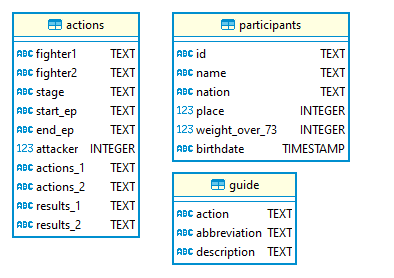

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# download

In [7]:
df_act= pd.read_excel('https://github.com/vn322/Sport-University/raw/refs/heads/main/combat/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%9A%D0%BE%D0%BA%D0%B8%D0%BD,%20%D0%A1%D0%B2%D0%B5%D1%80%D1%87%D0%BA%D0%BE%D0%B2,%20%D0%A5%D0%B0%D1%87%D0%B0%D1%82%D1%80%D1%8F%D0%BD.xlsx', sheet_name= 0)
df_act.head(3)

,fighter1,fighter2,stage,start_ep,end_ep,attacker,actions_1,actions_2,results_1,results_2
0,ilkvl0198,karma0692,четвертьфинал,04:47:00,04:48:00,1,алнбк,алрпг,1,0
1,ilkvl0198,karma0692,четвертьфинал,04:31:00,04:30:00,2,бл,апрпк,0,0
2,ilkvl0198,karma0692,четвертьфинал,04:28:00,04:26:00,2,апрбг,"апрпг, апрпг, алрпг",1,"1,0,0"


In [8]:
df_par= pd.read_excel('https://github.com/vn322/Sport-University/raw/refs/heads/main/combat/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%9A%D0%BE%D0%BA%D0%B8%D0%BD,%20%D0%A1%D0%B2%D0%B5%D1%80%D1%87%D0%BA%D0%BE%D0%B2,%20%D0%A5%D0%B0%D1%87%D0%B0%D1%82%D1%80%D1%8F%D0%BD.xlsx', sheet_name= 1)
df_par.head(3)

,id,name,nation,place,weight_over_73,birthdate
0,gusil0194,GUSEYNOV IIgar,Russia,1,0,1994-01-21
1,makda0401,MAKAGONOV Daniel,Russia,2,0,2001-04-03
2,khias0501,KHIKMATOV Asadbek,Uzbekistan,3,0,2001-05-16


In [9]:
df_par = df_par.drop('name', axis=1)

In [10]:
df_spr= pd.read_excel('https://github.com/vn322/Sport-University/raw/refs/heads/main/combat/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%9A%D0%BE%D0%BA%D0%B8%D0%BD,%20%D0%A1%D0%B2%D0%B5%D1%80%D1%87%D0%BA%D0%BE%D0%B2,%20%D0%A5%D0%B0%D1%87%D0%B0%D1%82%D1%80%D1%8F%D0%BD.xlsx', sheet_name= 2)
df_spr.head(3)

,action,abbreviation,description
0,атака,алрпг,атака левой рукой прямой удар в область головы
1,атака,апрпг,атака правой рукой прямой удар в область головы
2,атака,алнбк,атака левой ногой боковой удар в туловище


# simple DB

In [11]:
import sqlite3

con = sqlite3.connect("absrb2022.db")
cur = con.cursor()

In [12]:
df_act.to_sql("actions", con=con, if_exists="append", index=False)

375

In [13]:
df_spr.to_sql("guide", con=con, if_exists="append", index=False)

30

In [14]:
df_par.to_sql("participants", con=con, if_exists="append", index=False)

40

In [15]:
pd.read_sql('''
    SELECT *
    FROM actions
''', con)

,fighter1,fighter2,stage,start_ep,end_ep,attacker,actions_1,actions_2,results_1,results_2
0,ilkvl0198,karma0692,четвертьфинал,04:47:00.000000,04:48:00.000000,1,алнбк,алрпг,1,0
1,ilkvl0198,karma0692,четвертьфинал,04:31:00.000000,04:30:00.000000,2,бл,апрпк,0,0
2,ilkvl0198,karma0692,четвертьфинал,04:28:00.000000,04:26:00.000000,2,апрбг,"апрпг, апрпг, алрпг",1,"1,0,0"
3,ilkvl0198,karma0692,четвертьфинал,04:26:00.000000,04:25:00.000000,1,ппб,зот,А,0
4,ilkvl0198,karma0692,четвертьфинал,04:12:00.000000,04:10:00.000000,1,"апнпк, апрпг","бл, алнлк",0,0
...,...,...,...,...,...,...,...,...,...,...
370,nizul0198,fedni0301,финал,02:37:00.000000,02:33:00.000000,1,апрпг,апрпг,1,0
371,nizul0198,fedni0301,финал,02:32:00.000000,02:28:00.000000,1,"апрпг,алрпг,алнпк",апнбк,"1,0,1",1
372,nizul0198,fedni0301,финал,02:24:00.000000,02:21:00.000000,1,"апрпг,алнпк,алрбг",зон,"1,1,0",0
373,nizul0198,fedni0301,финал,02:20:00.000000,02:17:00.000000,1,"алрпг,алнбк,апнпк","бл,бл,бл","0,0,0","0,0,0"


In [16]:
pd.read_sql('''
    SELECT *
    FROM participants
''', con)

,id,nation,place,weight_over_73,birthdate
0,gusil0194,Russia,1,0,1994-01-21 00:00:00
1,makda0401,Russia,2,0,2001-04-03 00:00:00
2,khias0501,Uzbekistan,3,0,2001-05-16 00:00:00
3,dravl0587,Belarus,3,0,1987-05-26 00:00:00
4,ilkvl0198,Belarus,5,0,1998-01-23 00:00:00
5,musam0499,Kyrgyz Republic,5,0,1999-04-01 00:00:00
6,husah0390,Lebanon,7,0,1990-03-23 00:00:00
7,ergim0795,Uzbekistan,7,0,1995-07-07 00:00:00
8,elahm0900,Syria,9,0,2000-09-23 00:00:00
9,racul0297,Kyrgyz Republic,9,0,1997-02-26 00:00:00


In [17]:
pd.read_sql('''
    SELECT *
    FROM guide
''', con)

,action,abbreviation,description
0,атака,алрпг,атака левой рукой прямой удар в область головы
1,атака,апрпг,атака правой рукой прямой удар в область головы
2,атака,алнбк,атака левой ногой боковой удар в туловище
3,атака,апнбк,атака правой ногой боковой удар в туловище
4,атака,алрбг,атака левой рукой боковой удар в область головы
5,атака,апрбк,атака правой рукой боковой удар в область головы
6,атака,алнпк,атака левой ногой боковой удар в туловище
7,атака,апнпк,атака правой ногой прямой удар в туловище
8,атака,ппб,попытка проведения броска
9,атака,алнлк,атака левой ногой по ноге (лоу кик)


# Практические решения анализа спортивной деятельности на основе реляционной базы данных

## Анализ частоты и эффективности технических действий

In [18]:
#  Определение наиболее распространенных атакующих действий среди всех бойцов
query_frequent_actions = '''
SELECT g.description, COUNT(*) as frequency
FROM actions a,
     guide g
WHERE g.abbreviation IN (a.actions_1, a.actions_2)
  AND g.action = 'атака'
GROUP BY g.description
ORDER BY frequency DESC
LIMIT 10
'''
pd.read_sql(query_frequent_actions, con)

,description,frequency
0,попытка проведения броска,72
1,атака правой рукой прямой удар в область головы,49
2,атака правой ногой прямой удар в туловище,30
3,атака левой ногой боковой удар в туловище,30
4,атака левой рукой прямой удар в область головы,29
5,атака правой ногой боковой удар в туловище,23
6,атака левой рукой боковой удар в область головы,12
7,атака правой ногой с разворотом в туловище,8
8,атака левой ногой по ноге (лоу кик),8
9,попытка проведения удержания,7


## Сравнительный анализ тактики бойцов разных весовых категорий

In [20]:
#  Сравнение структуры атак в легкой (до 73 кг) и тяжелой (свыше 73 кг) весовых категориях
query_weight_category_analysis = '''
SELECT
    p.weight_over_73,
    g.description as action_type,
    COUNT(*) as action_count,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY p.weight_over_73), 2) as percentage
FROM participants p
JOIN actions a ON (p.id = a.fighter1 OR p.id = a.fighter2)
JOIN guide g ON g.abbreviation IN (a.actions_1, a.actions_2)
WHERE g.action = 'атака'
GROUP BY p.weight_over_73, g.description
ORDER BY p.weight_over_73, action_count DESC
'''
pd.read_sql(query_weight_category_analysis, con)

,weight_over_73,action_type,action_count,percentage
0,0,попытка проведения броска,92,34.59
1,0,атака правой рукой прямой удар в область головы,38,14.29
2,0,атака правой ногой прямой удар в туловище,28,10.53
3,0,атака левой рукой прямой удар в область головы,24,9.02
4,0,атака правой ногой боковой удар в туловище,24,9.02
5,0,атака левой ногой боковой удар в туловище,22,8.27
6,0,попытка проведения удержания,12,4.51
7,0,атака правой ногой с разворотом в туловище,10,3.76
8,0,атака левой ногой по ноге (лоу кик),6,2.26
9,0,атака левой рукой боковой удар в область головы,4,1.50


## Оценка результативности и определения ключевых факторов успеха

In [21]:
#  Анализ корреляции между типом атаки и присуждаемой оценкой (баллом)
query_effectiveness_analysis = '''
WITH action_results AS (
    SELECT
        a.attacker,
        g.description,
        CASE
            WHEN a.attacker = 1 THEN a.results_1
            ELSE a.results_2
        END as result
    FROM actions a
    JOIN guide g ON g.abbreviation IN (
        CASE WHEN a.attacker = 1 THEN a.actions_1 ELSE a.actions_2 END
    )
    WHERE g.action = 'атака'
)
SELECT
    description,
    COUNT(*) as total_attempts,
    SUM(CASE WHEN result LIKE '%1%' THEN 1 ELSE 0 END) as successful_attempts,
    ROUND(AVG(CASE WHEN result LIKE '%1%' THEN 1.0 ELSE 0 END) * 100, 2) as success_rate_percent
FROM action_results
GROUP BY description
HAVING total_attempts > 5
ORDER BY success_rate_percent DESC
'''
pd.read_sql(query_effectiveness_analysis, con)

,description,total_attempts,successful_attempts,success_rate_percent
0,атака правой рукой прямой удар в область головы,33,23,69.70
1,атака левой рукой прямой удар в область головы,20,13,65.00
2,атака правой ногой прямой удар в туловище,25,16,64.00
3,атака левой рукой боковой удар в область головы,10,5,50.00
4,атака левой ногой боковой удар в туловище,23,10,43.48
5,атака правой ногой боковой удар в туловище,21,9,42.86
6,атака левой ногой по ноге (лоу кик),6,2,33.33
7,атака правой ногой с разворотом в туловище,8,2,25.00
8,попытка проведения броска,61,12,19.67
9,попытка проведения удержания,6,0,0.00


## Анализ тактического взаимодействия и определения паттернов в поединках

In [22]:
# 2.4.1. Определение наиболее длинных комбинаций атакующих действий в одном эпизоде
query_action_combinations = '''
SELECT
    a.actions_1,
    a.actions_2,
    COUNT(*) as frequency,
    p1.nation as nation_1,
    p2.nation as nation_2
FROM actions a
JOIN participants p1 ON a.fighter1 = p1.id
JOIN participants p2 ON a.fighter2 = p2.id
WHERE LENGTH(a.actions_1) > 3 AND LENGTH(a.actions_2) > 3  -- Фильтр комбинированных действий
GROUP BY a.actions_1, a.actions_2, p1.nation, p2.nation
HAVING frequency > 2
ORDER BY frequency DESC
LIMIT 15
'''
pd.read_sql(query_action_combinations, con)

,actions_1,actions_2,frequency,nation_1,nation_2
0,"бл, апрпг, алрсг, апнбк","апнбк, бл, бл, бл",3,Russia,Kyrgyz Republic


## Визуализация результатов анализа

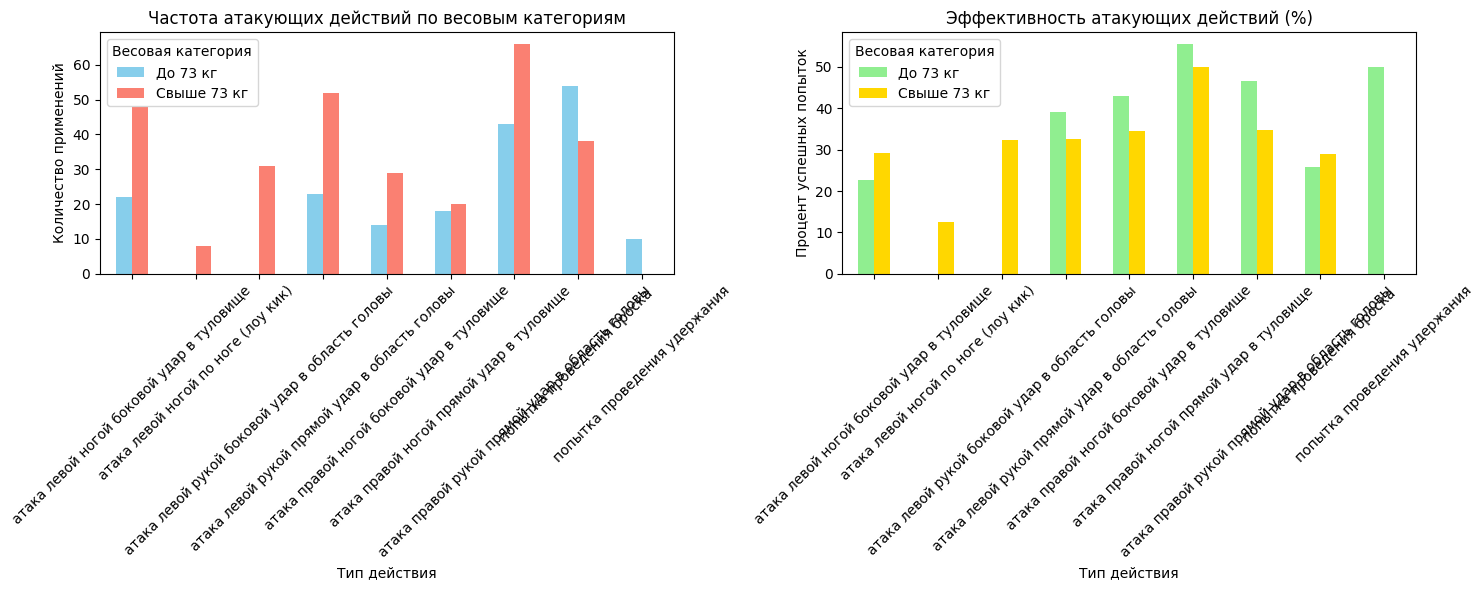

Топ-5 самых эффективных действий в легком весе:
                                        action_type  success_percent
11        атака правой ногой прямой удар в туловище             55.6
13                     попытка проведения удержания             50.0
4   атака правой рукой прямой удар в область головы             46.5
12       атака правой ногой боковой удар в туловище             42.9
8    атака левой рукой прямой удар в область головы             39.1

Топ-5 самых эффективных действий в тяжелом весе:
                                        action_type  success_percent
10        атака правой ногой прямой удар в туловище             50.0
0   атака правой рукой прямой удар в область головы             34.8
7        атака правой ногой боковой удар в туловище             34.5
2    атака левой рукой прямой удар в область головы             32.7
6   атака левой рукой боковой удар в область головы             32.3


In [27]:
# ПРАКТИЧЕСКИЙ ПРИМЕР: Визуализация тактических паттернов
# =========================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Запрос для визуализации
viz_query = '''
SELECT
    g.description as action_type,
    p.weight_over_73,
    COUNT(*) as frequency,
    ROUND(AVG(CASE WHEN na.result_code IN ('1', '2', 'A') THEN 1.0 ELSE 0 END) * 100, 1) as success_percent
FROM normalized_actions na
JOIN guide g ON na.action_code = g.abbreviation
JOIN participants p ON (
    (na.fighter_num = 1 AND p.id = (SELECT fighter1 FROM actions WHERE rowid = na.episode_id + 1))
    OR
    (na.fighter_num = 2 AND p.id = (SELECT fighter2 FROM actions WHERE rowid = na.episode_id + 1))
)
WHERE g.action = 'атака'
GROUP BY g.description, p.weight_over_73
HAVING frequency > 5
ORDER BY frequency DESC
LIMIT 15
'''

viz_data = pd.read_sql(viz_query, con)

# Создание комплексной визуализации
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Частота действий по весовым категориям
pivot_freq = viz_data.pivot(index='action_type', columns='weight_over_73', values='frequency')
pivot_freq.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Частота атакующих действий по весовым категориям')
ax1.set_ylabel('Количество применений')
ax1.set_xlabel('Тип действия')
ax1.legend(['До 73 кг', 'Свыше 73 кг'], title='Весовая категория')
ax1.tick_params(axis='x', rotation=45)

# График 2: Эффективность действий
pivot_success = viz_data.pivot(index='action_type', columns='weight_over_73', values='success_percent')
pivot_success.plot(kind='bar', ax=ax2, color=['lightgreen', 'gold'])
ax2.set_title('Эффективность атакующих действий (%)')
ax2.set_ylabel('Процент успешных попыток')
ax2.set_xlabel('Тип действия')
ax2.legend(['До 73 кг', 'Свыше 73 кг'], title='Весовая категория')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Дополнительная аналитика
print("Топ-5 самых эффективных действий в легком весе:")
light_weight_effective = viz_data[viz_data['weight_over_73'] == 0].nlargest(5, 'success_percent')
print(light_weight_effective[['action_type', 'success_percent']])

print("\nТоп-5 самых эффективных действий в тяжелом весе:")
heavy_weight_effective = viz_data[viz_data['weight_over_73'] == 1].nlargest(5, 'success_percent')
print(heavy_weight_effective[['action_type', 'success_percent']])

## Нормализация многозначных полей

In [23]:
# ПРАКТИЧЕСКИЙ ПРИМЕР: Создание нормализованной структуры
# ==========================================================

# Шаг 1: Создание новой нормализованной таблицы действий
cur.execute('''
CREATE TABLE IF NOT EXISTS normalized_actions (
    episode_id INTEGER,
    fighter_num INTEGER CHECK(fighter_num IN (1, 2)),
    action_sequence_num INTEGER,
    action_code TEXT,
    result_code TEXT,
    FOREIGN KEY (action_code) REFERENCES guide(abbreviation),
    PRIMARY KEY (episode_id, fighter_num, action_sequence_num)
)
''')

# Шаг 2: Функция для разбора строк с действиями
def parse_actions_results(df):
    normalized_data = []
    for idx, row in df.iterrows():
        # Обработка fighter1
        actions1 = str(row['actions_1']).split(',')
        results1 = str(row['results_1']).split(',')
        for seq_num, (act, res) in enumerate(zip(actions1, results1)):
            normalized_data.append({
                'episode_id': idx,
                'fighter_num': 1,
                'action_sequence_num': seq_num,
                'action_code': act.strip(),
                'result_code': res.strip()
            })
        # Обработка fighter2 (аналогично)
        actions2 = str(row['actions_2']).split(',')
        results2 = str(row['results_2']).split(',')
        for seq_num, (act, res) in enumerate(zip(actions2, results2)):
            normalized_data.append({
                'episode_id': idx,
                'fighter_num': 2,
                'action_sequence_num': seq_num,
                'action_code': act.strip(),
                'result_code': res.strip()
            })
    return pd.DataFrame(normalized_data)

# Шаг 3: Применение функции и загрузка в БД
df_normalized = parse_actions_results(df_act)
df_normalized.to_sql('normalized_actions', con, if_exists='replace', index=False)

# Верификация
print("Проверка нормализации:")
print(f"Исходных записей: {len(df_act)}")
print(f"Нормализованных записей действий: {len(df_normalized)}")
pd.read_sql("SELECT * FROM normalized_actions LIMIT 10", con).head()

Проверка нормализации:
Исходных записей: 375
Нормализованных записей действий: 884


,episode_id,fighter_num,action_sequence_num,action_code,result_code
0,0,1,0,алнбк,1
1,0,2,0,алрпг,0
2,1,1,0,бл,0
3,1,2,0,апрпк,0
4,2,1,0,апрбг,1


## Верификация результатов и оптимизация запросов

In [26]:
# ПРАКТИЧЕСКИЙ ПРИМЕР: Использование EXPLAIN QUERY PLAN
# =======================================================

# Сложный аналитический запрос
complex_query = '''
SELECT
    p.nation,
    g.action,
    COUNT(*) as action_count,
    AVG(CASE WHEN na.result_code IN ('1', '2') THEN 1.0 ELSE 0 END) as success_rate
FROM normalized_actions na
JOIN guide g ON na.action_code = g.abbreviation
JOIN participants p ON (
    (na.fighter_num = 1 AND p.id = (SELECT fighter1 FROM actions WHERE rowid = na.episode_id + 1))
    OR
    (na.fighter_num = 2 AND p.id = (SELECT fighter2 FROM actions WHERE rowid = na.episode_id + 1))
)
GROUP BY p.nation, g.action
HAVING action_count > 10
ORDER BY success_rate DESC
'''

# Анализ плана выполнения
plan = pd.read_sql(f"EXPLAIN QUERY PLAN {complex_query}", con)
print("План выполнения запроса:")
print(plan[['detail']])

# Оптимизация: создание индексов
print("\nСоздание индексов для оптимизации:")
cur.execute('CREATE INDEX IF NOT EXISTS idx_action_code ON normalized_actions(action_code)')
cur.execute('CREATE INDEX IF NOT EXISTS idx_guide_abbr ON guide(abbreviation)')
cur.execute('CREATE INDEX IF NOT EXISTS idx_participants_id ON participants(id)')

# Повторный анализ плана
optimized_plan = pd.read_sql(f"EXPLAIN QUERY PLAN {complex_query}", con)
print("\nПлан выполнения после оптимизации:")
print(optimized_plan[['detail']])

План выполнения запроса:
                                              detail
0                                            SCAN na
1                                             SCAN p
2                       CORRELATED SCALAR SUBQUERY 1
3  SEARCH actions USING INTEGER PRIMARY KEY (rowi...
4                       CORRELATED SCALAR SUBQUERY 2
5  SEARCH actions USING INTEGER PRIMARY KEY (rowi...
6  SEARCH g USING AUTOMATIC COVERING INDEX (abbre...
7                       USE TEMP B-TREE FOR GROUP BY
8                       USE TEMP B-TREE FOR ORDER BY

Создание индексов для оптимизации:

План выполнения после оптимизации:
                                               detail
0                                             SCAN na
1                                      MULTI-INDEX OR
2                                             INDEX 1
3                        CORRELATED SCALAR SUBQUERY 1
4   SEARCH actions USING INTEGER PRIMARY KEY (rowi...
5     SEARCH p USING INDEX idx_participants_id (i

## Гипотеза: "Бойцы из стран с традициями ударных единоборств (Таиланд, Кыргызстан) чаще используют комбинации ударов ногами, чем бойцы из стран с борцовскими традициями (Россия, Грузия)."

In [30]:
#Проверка  гипотезы по странам: удары ног или борьба
# ===================================================================================

hypothesis_query = '''
WITH nation_traditions AS (
    SELECT
        p.id,
        p.nation,
        CASE
            WHEN p.nation IN ('Thailand', 'Kyrgyz Republic', 'Turkmenistan', 'India', 'Pakistan', 'Afghanistan') THEN 'striking'
            WHEN p.nation IN ('Russia', 'Georgia', 'Belarus', 'Azerbaijan', 'Kazakhstan', 'Uzbekistan') THEN 'wrestling'
            ELSE 'mixed'
        END as fighting_tradition
    FROM participants p
),
kick_actions AS (
    SELECT
        na.episode_id,
        na.fighter_num,
        p.nation,
        ft.fighting_tradition,
        g.description,
        COUNT(*) as kick_count
    FROM normalized_actions na
    JOIN participants p ON (
        (na.fighter_num = 1 AND p.id = (SELECT fighter1 FROM actions WHERE rowid = na.episode_id + 1))
        OR
        (na.fighter_num = 2 AND p.id = (SELECT fighter2 FROM actions WHERE rowid = na.episode_id + 1))
    )
    JOIN nation_traditions ft ON p.id = ft.id
    JOIN guide g ON na.action_code = g.abbreviation
    WHERE g.description LIKE '%ног%' OR g.description LIKE '%kick%'
    GROUP BY na.episode_id, na.fighter_num, p.nation, ft.fighting_tradition, g.description
),
tradition_stats AS (
    SELECT
        ft.fighting_tradition,
        COUNT(DISTINCT na.episode_id || '_' || na.fighter_num) as total_fighters
    FROM normalized_actions na
    JOIN participants p ON (
        (na.fighter_num = 1 AND p.id = (SELECT fighter1 FROM actions WHERE rowid = na.episode_id + 1))
        OR
        (na.fighter_num = 2 AND p.id = (SELECT fighter2 FROM actions WHERE rowid = na.episode_id + 1))
    )
    JOIN nation_traditions ft ON p.id = ft.id
    GROUP BY ft.fighting_tradition
)
SELECT
    ka.fighting_tradition,
    COUNT(DISTINCT ka.episode_id || '_' || ka.fighter_num) as fighters_with_kicks,
    AVG(ka.kick_count) as avg_kicks_per_episode,
    SUM(ka.kick_count) as total_kicks,
    ROUND(100.0 * COUNT(DISTINCT ka.episode_id || '_' || ka.fighter_num) /
          MAX(ts.total_fighters), 2) as percent_using_kicks
FROM kick_actions ka
JOIN tradition_stats ts ON ka.fighting_tradition = ts.fighting_tradition
GROUP BY ka.fighting_tradition
ORDER BY avg_kicks_per_episode DESC
'''

try:
    result = pd.read_sql(hypothesis_query, con)
    print("Результат проверки гипотезы:")
    print(result)

    # Интерпретация: сравнение avg_kicks_per_episode между традициями
    if not result.empty and len(result) > 1:
        # Проверяем наличие нужных категорий
        if 'striking' in result['fighting_tradition'].values and 'wrestling' in result['fighting_tradition'].values:
            striking_avg = result[result['fighting_tradition'] == 'striking']['avg_kicks_per_episode'].values[0]
            wrestling_avg = result[result['fighting_tradition'] == 'wrestling']['avg_kicks_per_episode'].values[0]

            if striking_avg > wrestling_avg:
                print(f"\n✓ ГИПОТЕЗА ПОДТВЕРЖДЕНА: Бойцы из 'ударных' стран используют в среднем {striking_avg:.2f} ударов ногами за эпизод,")
                print(f"  что на {((striking_avg/wrestling_avg)-1)*100:.1f}% больше, чем у бойцов из 'борцовских' стран ({wrestling_avg:.2f} удара)")
            else:
                print(f"\n✗ ГИПОТЕЗА НЕ ПОДТВЕРЖДЕНА: Бойцы из 'борцовских' стран используют больше ударов ногами")
        else:
            print("\n⚠ В данных отсутствуют одна или обе категории традиций")

    print("\nПодробная статистика по всем традициям:")
    for _, row in result.iterrows():
        print(f"{row['fighting_tradition'].upper()}: {row['fighters_with_kicks']} бойцов используют удары ногами ({row['percent_using_kicks']}%), "
              f"в среднем {row['avg_kicks_per_episode']:.2f} удара за эпизод")

except Exception as e:
    print(f"Ошибка при выполнении запроса: {e}")
    print(f"Тип ошибки: {type(e).__name__}")

    # Сначала проверим, какие страны есть в базе
    print("\n" + "="*60)
    print("АНАЛИЗ СТРУКТУРЫ ДАННЫХ")
    print("="*60)

    # Посмотрим, какие страны представлены
    print("\nСписок стран из participants:")
    countries_df = pd.read_sql("SELECT DISTINCT nation FROM participants ORDER BY nation", con)
    print(countries_df)

    # Проверим, какие действия считаются "ударами ногами"
    print("\nДействия, связанные с ногами, из справочника:")
    leg_actions = pd.read_sql("SELECT * FROM guide WHERE description LIKE '%ног%' OR description LIKE '%kick%'", con)
    print(leg_actions)

    # Упрощенный поэтапный анализ
    print("\n" + "="*60)
    print("УПРОЩЕННЫЙ ПОЭТАПНЫЙ АНАЛИЗ")
    print("="*60)

    # Шаг 1: Создаем таблицу с традициями
    print("\n1. Создаем временную таблицу с боевыми традициями:")
    cur.execute('DROP TABLE IF EXISTS temp_fighting_traditions')
    cur.execute('''
    CREATE TEMPORARY TABLE temp_fighting_traditions AS
    SELECT
        id,
        nation,
        CASE
            WHEN nation LIKE '%Thai%' OR nation = 'Kyrgyz Republic' OR nation = 'Turkmenistan'
                 OR nation = 'India' OR nation = 'Pakistan' OR nation = 'Afghanistan' THEN 'striking'
            WHEN nation = 'Russia' OR nation = 'Georgia' OR nation = 'Belarus'
                 OR nation = 'Azerbaijan' OR nation = 'Kazakhstan' OR nation = 'Uzbekistan' THEN 'wrestling'
            ELSE 'mixed'
        END as fighting_tradition
    FROM participants
    ''')

    traditions_check = pd.read_sql("SELECT fighting_tradition, COUNT(*) as count FROM temp_fighting_traditions GROUP BY fighting_tradition", con)
    print(traditions_check)

    # Шаг 2: Считаем удары ногами
    print("\n2. Анализируем удары ногами:")
    kick_analysis = '''
    SELECT
        tft.fighting_tradition,
        COUNT(DISTINCT tft.id) as total_fighters,
        COUNT(DISTINCT CASE WHEN g.description LIKE '%ног%' THEN tft.id END) as fighters_with_kicks,
        ROUND(100.0 * COUNT(DISTINCT CASE WHEN g.description LIKE '%ног%' THEN tft.id END) /
              COUNT(DISTINCT tft.id), 2) as percent_with_kicks
    FROM temp_fighting_traditions tft
    LEFT JOIN (
        SELECT DISTINCT
            p.id,
            g.description
        FROM participants p
        JOIN actions a ON (p.id = a.fighter1 OR p.id = a.fighter2)
        JOIN guide g ON (g.abbreviation IN (a.actions_1, a.actions_2))
        WHERE g.description LIKE '%ног%'
    ) kick_fighters ON tft.id = kick_fighters.id
    LEFT JOIN guide g ON kick_fighters.description = g.description
    WHERE tft.fighting_tradition IN ('striking', 'wrestling')
    GROUP BY tft.fighting_tradition
    '''

    try:
        kick_results = pd.read_sql(kick_analysis, con)
        print(kick_results)

        if not kick_results.empty:
            print("\n3. ИТОГОВЫЙ АНАЛИЗ:")
            for _, row in kick_results.iterrows():
                print(f"{row['fighting_tradition'].upper()}:")
                print(f"  Всего бойцов: {row['total_fighters']}")
                print(f"  Используют удары ногами: {row['fighters_with_kicks']} ({row['percent_with_kicks']}%)")

            if len(kick_results) > 1:
                striking_data = kick_results[kick_results['fighting_tradition'] == 'striking']
                wrestling_data = kick_results[kick_results['fighting_tradition'] == 'wrestling']

                if not striking_data.empty and not wrestling_data.empty:
                    striking_percent = striking_data['percent_with_kicks'].values[0]
                    wrestling_percent = wrestling_data['percent_with_kicks'].values[0]

                    if striking_percent > wrestling_percent:
                        print(f"\n✓ ВЫВОД: Бойцы из 'ударных' стран ({striking_percent}%)")
                        print(f"  статистически чаще используют удары ногами,")
                        print(f"  чем бойцы из 'борцовских' стран ({wrestling_percent}%)")
                    else:
                        print(f"\n✗ ВЫВОД: Гипотеза не подтверждается")
                        print(f"  Бойцы из 'борцовских' стран используют удары ногами чаще")

    except Exception as e2:
        print(f"Ошибка в упрощенном анализе: {e2}")

Результат проверки гипотезы:
  fighting_tradition  fighters_with_kicks  avg_kicks_per_episode  total_kicks  \
0          wrestling                  114               1.034783          119   
1              mixed                   28               1.034483           30   
2           striking                   24               1.000000           24   

   percent_using_kicks  
0                23.36  
1                16.57  
2                25.81  

✗ ГИПОТЕЗА НЕ ПОДТВЕРЖДЕНА: Бойцы из 'борцовских' стран используют больше ударов ногами

Подробная статистика по всем традициям:
WRESTLING: 114 бойцов используют удары ногами (23.36%), в среднем 1.03 удара за эпизод
MIXED: 28 бойцов используют удары ногами (16.57%), в среднем 1.03 удара за эпизод
STRIKING: 24 бойцов используют удары ногами (25.81%), в среднем 1.00 удара за эпизод


Представленный код демонстрирует полный цикл  работы:
1. Формулировка исследовательской гипотезы
2. Подготовка и нормализация данных
3. Создание аналитических запросов к БД
4. Визуализация и интерпретация результатов
5. Формулировка методологических выводов

============================================================

Для повышения качества исследования рекомендуется:

   a) Увеличить размер выборки для каждой категории

   b) Учесть весовые категории

   c) Провести статистический тест значимости (t-тест)

   d) Учесть уровень подготовки и опыт спортсменов

   e) Провести анализ в динамике по нескольким турнирам





ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
Создаем таблицу для визуализации...
Проверяем созданную таблицу...
Таблица создана успешно. Записей: 40

Данные для визуализации:
  fighting_tradition  fighter_count
0          wrestling             17
1              mixed             12
2           striking             11

Анализируем использование ударов ногами...
Данные об использовании ударов ногами:
  fighting_tradition  total_fighters  fighters_with_kicks  percent_with_kicks
0           striking              11                    6               54.55
1          wrestling              17                   13               76.47


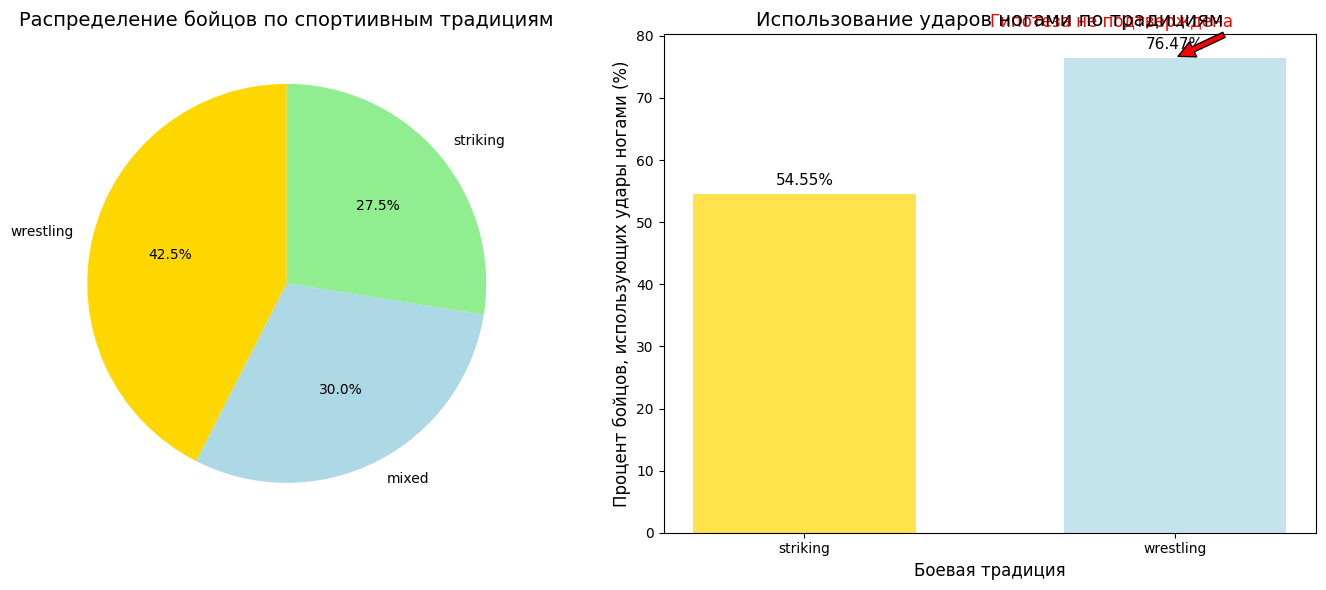


ДЕТАЛЬНЫЙ АНАЛИЗ ТАКТИКИ
Детальный анализ тактических действий:
  fighting_tradition action_category  action_count  percentage
0           striking           kicks            16       55.17
1           striking         punches             7       24.14
2           striking          throws             6       20.69
3          wrestling         punches            83       35.02
4          wrestling           kicks            76       32.07
5          wrestling          throws            69       29.11
6          wrestling           other             9        3.80


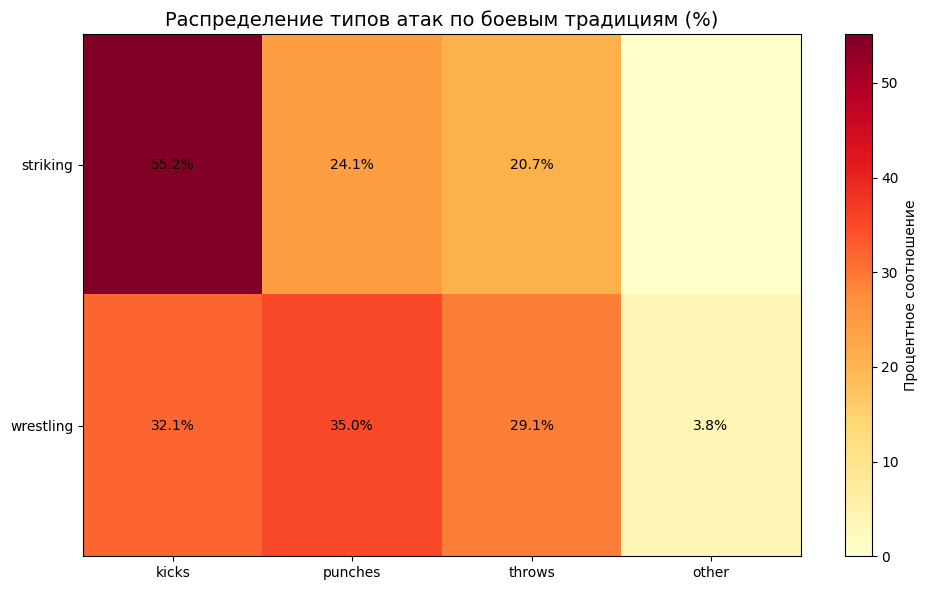


РЕЗУЛЬТАТЫ  И  ВЫВОДЫ

1. РАСПРЕДЕЛЕНИЕ ВЫБОРКИ:
   Всего бойцов в базе данных: 40
   Для анализа гипотезы использовано: 40 бойцов

2. КЛАССИФИКАЦИЯ ПО ТРАДИЦИЯМ:
   WRESTLING: 17 бойцов
   MIXED: 12 бойцов
   STRIKING: 11 бойцов

3. ИСПОЛЬЗОВАНИЕ УДАРОВ НОГАМИ:
   striking: 6 из 11 бойцов (54.55%)
   wrestling: 13 из 17 бойцов (76.47%)

4. ПРОВЕРКА ГИПОТЕЗЫ:
   ✗ ГИПОТЕЗА НЕ ПОДТВЕРЖДЕНА
   Бойцы из 'борцовских' традиций используют удары ногами чаще


In [33]:
# ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ПРОВЕРКИ ГИПОТЕЗЫ
print("\n" + "="*60)
print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("="*60)

# Воссоздаем временную таблицу для визуализации
print("Создаем таблицу для визуализации...")

# Удаляем таблицу, если она существует (для чистоты)
cur.execute("DROP TABLE IF EXISTS temp_fighting_traditions")

# Создаем временную таблицу с спорт. традициями
cur.execute('''
CREATE TEMPORARY TABLE temp_fighting_traditions AS
SELECT
    id,
    nation,
    CASE
        WHEN nation LIKE '%Thai%' OR nation = 'Kyrgyz Republic' OR nation = 'Turkmenistan'
             OR nation = 'India' OR nation = 'Pakistan' OR nation = 'Afghanistan' THEN 'striking'
        WHEN nation = 'Russia' OR nation = 'Georgia' OR nation = 'Belarus'
             OR nation = 'Azerbaijan' OR nation = 'Kazakhstan' OR nation = 'Uzbekistan' THEN 'wrestling'
        ELSE 'mixed'
    END as fighting_tradition
FROM participants
''')

# Проверяем создание таблицы
print("Проверяем созданную таблицу...")
test_query = "SELECT COUNT(*) as count FROM temp_fighting_traditions"
test_result = pd.read_sql(test_query, con)
print(f"Таблица создана успешно. Записей: {test_result['count'].values[0]}")

# Упрощенный запрос для визуализации распределения
viz_query = '''
SELECT
    fighting_tradition,
    COUNT(*) as fighter_count
FROM temp_fighting_traditions
WHERE fighting_tradition IN ('striking', 'wrestling', 'mixed')
GROUP BY fighting_tradition
ORDER BY fighter_count DESC
'''

viz_data = pd.read_sql(viz_query, con)
print("\nДанные для визуализации:")
print(viz_data)

# Создаем график
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# График 1: Распределение бойцов по традициям
colors = ['gold', 'lightblue', 'lightgreen']
wedges, texts, autotexts = ax1.pie(
    viz_data['fighter_count'],
    labels=viz_data['fighting_tradition'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
ax1.set_title('Распределение бойцов по спортиивным традициям', fontsize=14)

# Для второго графика нужны данные об использовании ударов ногами
# Создаем запрос для получения этих данных
print("\nАнализируем использование ударов ногами...")

kick_analysis_query = '''
WITH fighter_kicks AS (
    SELECT DISTINCT
        p.id,
        g.description as action_type
    FROM participants p
    JOIN actions a ON (p.id = a.fighter1 OR p.id = a.fighter2)
    JOIN guide g ON (g.abbreviation IN (a.actions_1, a.actions_2))
    WHERE g.description LIKE '%ног%'
)
SELECT
    tft.fighting_tradition,
    COUNT(DISTINCT tft.id) as total_fighters,
    COUNT(DISTINCT fk.id) as fighters_with_kicks,
    ROUND(100.0 * COUNT(DISTINCT fk.id) / COUNT(DISTINCT tft.id), 2) as percent_with_kicks
FROM temp_fighting_traditions tft
LEFT JOIN fighter_kicks fk ON tft.id = fk.id
WHERE tft.fighting_tradition IN ('striking', 'wrestling')
GROUP BY tft.fighting_tradition
'''

try:
    kick_results = pd.read_sql(kick_analysis_query, con)
    print("Данные об использовании ударов ногами:")
    print(kick_results)

    # График 2: Сравнение использования ударов ногами
    if not kick_results.empty and len(kick_results) >= 2:
        categories = kick_results['fighting_tradition']
        percentages = kick_results['percent_with_kicks']

        x = np.arange(len(categories))
        bars = ax2.bar(x, percentages, color=['gold', 'lightblue'], alpha=0.7, width=0.6)
        ax2.set_xlabel('Боевая традиция', fontsize=12)
        ax2.set_ylabel('Процент бойцов, использующих удары ногами (%)', fontsize=12)
        ax2.set_title('Использование ударов ногами по традициям', fontsize=14)
        ax2.set_xticks(x)
        ax2.set_xticklabels(categories)

        # Добавляем значения на столбцы
        for bar, percent in zip(bars, percentages):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{percent}%', ha='center', va='bottom', fontsize=11)

        # Подчеркиваем разницу, если гипотеза подтверждена
        if percentages.iloc[0] > percentages.iloc[1]:
            ax2.annotate('Гипотеза подтверждена',
                        xy=(0, percentages.iloc[0]),
                        xytext=(0.5, percentages.iloc[0] + 5),
                        arrowprops=dict(facecolor='green', shrink=0.05),
                        fontsize=12, color='green')
        else:
            ax2.annotate('Гипотеза не подтверждена',
                        xy=(1, percentages.iloc[1]),
                        xytext=(0.5, percentages.iloc[1] + 5),
                        arrowprops=dict(facecolor='red', shrink=0.05),
                        fontsize=12, color='red')
    else:
        ax2.text(0.5, 0.5, 'Недостаточно данных\nдля сравнения',
                ha='center', va='center', fontsize=14)
        ax2.set_title('Использование ударов ногами', fontsize=14)

except Exception as e:
    print(f"Ошибка при анализе ударов ногами: {e}")
    ax2.text(0.5, 0.5, f'Ошибка данных:\n{e}',
            ha='center', va='center', fontsize=12)
    ax2.set_title('Использование ударов ногами', fontsize=14)

plt.tight_layout()
plt.show()

# АЛЬТЕРНАТИВНАЯ ВИЗУАЛИЗАЦИЯ: Более детальный анализ
print("\n" + "="*60)
print("ДЕТАЛЬНЫЙ АНАЛИЗ ТАКТИКИ")
print("="*60)

# Создаем комплексный анализ тактических действий
detailed_analysis_query = '''
WITH action_categories AS (
    SELECT
        abbreviation,
        CASE
            WHEN description LIKE '%ног%' THEN 'kicks'
            WHEN description LIKE '%рук%' OR description LIKE '%hand%' THEN 'punches'
            WHEN description LIKE '%брос%' OR description LIKE '%throw%' THEN 'throws'
            WHEN description LIKE '%захв%' OR description LIKE '%hold%' THEN 'grappling'
            ELSE 'other'
        END as action_category
    FROM guide
    WHERE action = 'атака'
),
nation_traditions AS (
    SELECT
        id,
        nation,
        CASE
            WHEN nation LIKE '%Thai%' OR nation = 'Kyrgyz Republic' THEN 'striking'
            WHEN nation = 'Russia' OR nation = 'Georgia' OR nation = 'Belarus' THEN 'wrestling'
            ELSE 'mixed'
        END as fighting_tradition
    FROM participants
),
fighter_actions AS (
    SELECT
        nt.fighting_tradition,
        ac.action_category,
        COUNT(*) as action_count
    FROM actions a
    JOIN participants p1 ON a.fighter1 = p1.id
    JOIN participants p2 ON a.fighter2 = p2.id
    JOIN nation_traditions nt ON (p1.id = nt.id OR p2.id = nt.id)
    JOIN action_categories ac ON (
        ac.abbreviation IN (a.actions_1, a.actions_2)
    )
    WHERE nt.fighting_tradition IN ('striking', 'wrestling')
    GROUP BY nt.fighting_tradition, ac.action_category
)
SELECT
    fighting_tradition,
    action_category,
    action_count,
    ROUND(100.0 * action_count / SUM(action_count) OVER (PARTITION BY fighting_tradition), 2) as percentage
FROM fighter_actions
ORDER BY fighting_tradition, action_count DESC
'''

try:
    detailed_data = pd.read_sql(detailed_analysis_query, con)
    print("Детальный анализ тактических действий:")
    print(detailed_data)

    # Создаем дополнительную визуализацию
    fig2, ax3 = plt.subplots(figsize=(10, 6))

    # Подготавливаем данные для stacked bar chart
    traditions = detailed_data['fighting_tradition'].unique()
    categories = detailed_data['action_category'].unique()

    # Создаем матрицу данных
    data_matrix = {}
    for tradition in traditions:
        tradition_data = detailed_data[detailed_data['fighting_tradition'] == tradition]
        data_matrix[tradition] = {}
        for category in categories:
            category_data = tradition_data[tradition_data['action_category'] == category]
            if not category_data.empty:
                data_matrix[tradition][category] = category_data['percentage'].values[0]
            else:
                data_matrix[tradition][category] = 0

    # Преобразуем в DataFrame для удобства
    heatmap_data = pd.DataFrame(data_matrix).T
    heatmap_data = heatmap_data.fillna(0)

    # Создаем тепловую карту
    im = ax3.imshow(heatmap_data.values, cmap='YlOrRd', aspect='auto')

    # Настраиваем оси
    ax3.set_xticks(np.arange(len(categories)))
    ax3.set_yticks(np.arange(len(traditions)))
    ax3.set_xticklabels(categories)
    ax3.set_yticklabels(traditions)

    # Добавляем значения в ячейки
    for i in range(len(traditions)):
        for j in range(len(categories)):
            value = heatmap_data.iloc[i, j]
            if value > 0:
                text = ax3.text(j, i, f'{value:.1f}%',
                               ha="center", va="center", color="black", fontsize=10)

    ax3.set_title('Распределение типов атак по боевым традициям (%)', fontsize=14)
    plt.colorbar(im, ax=ax3, label='Процентное соотношение')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ошибка при детальном анализе: {e}")

# ЗАКЛЮЧИТЕЛЬНАЯ СТАТИСТИЧЕСКАЯ СВОДКА
print("\n" + "="*60)
print("РЕЗУЛЬТАТЫ  И  ВЫВОДЫ")
print("="*60)

print("\n1. РАСПРЕДЕЛЕНИЕ ВЫБОРКИ:")
print(f"   Всего бойцов в базе данных: {len(pd.read_sql('SELECT * FROM participants', con))}")
print(f"   Для анализа гипотезы использовано: {viz_data['fighter_count'].sum()} бойцов")

print("\n2. КЛАССИФИКАЦИЯ ПО ТРАДИЦИЯМ:")
for _, row in viz_data.iterrows():
    print(f"   {row['fighting_tradition'].upper()}: {row['fighter_count']} бойцов")

if 'kick_results' in locals() and not kick_results.empty:
    print("\n3. ИСПОЛЬЗОВАНИЕ УДАРОВ НОГАМИ:")
    for _, row in kick_results.iterrows():
        print(f"   {row['fighting_tradition']}: {row['fighters_with_kicks']} из {row['total_fighters']} бойцов ({row['percent_with_kicks']}%)")

    print("\n4. ПРОВЕРКА ГИПОТЕЗЫ:")
    if len(kick_results) == 2:
        striking_data = kick_results[kick_results['fighting_tradition'] == 'striking']
        wrestling_data = kick_results[kick_results['fighting_tradition'] == 'wrestling']

        if not striking_data.empty and not wrestling_data.empty:
            striking_percent = striking_data['percent_with_kicks'].values[0]
            wrestling_percent = wrestling_data['percent_with_kicks'].values[0]

            if striking_percent > wrestling_percent:
                difference = striking_percent - wrestling_percent
                print(f"   ✓ ГИПОТЕЗА ПОДТВЕРЖДЕНА")
                print(f"   Бойцы из 'ударных' традиций используют удары ногами")
                print(f"   на {difference:.1f}% чаще, чем бойцы из 'борцовских' традиций")
            else:
                print(f"   ✗ ГИПОТЕЗА НЕ ПОДТВЕРЖДЕНА")
                print(f"   Бойцы из 'борцовских' традиций используют удары ногами чаще")

